<h2 style="font-family:camtasia;
          font-size:320%;
          font-weight: bold;
          color: #990033;
          text-align:center;
          margin: 0 auto;
          padding:10px; 
          border-radius:20px 20px;
          background-color: white;">
Project 1: Road Accidents Analysis
</h2>


<!-- <a id="import"> -->
<!-- </a> -->
# <p style="background-color: #990033; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:20px 20px;">Dataset Descriptions and Data Understanding</p>




1. Status: The status of the accident (e.g., reported, under investigation).

2. Accident_Index: A unique identifier for each reported accident.
Unique value for each accident. The accident_index combines the accident_year and accident_ref_no to form a unique ID. It can be used to join to Vehicle and Casualty

3. Accident_Year: The year in which the accident occurred.

4. Accident_Reference: A reference number associated with the accident.

5. Vehicle_Reference: A reference number for the involved vehicle in the accident.

6. Casualty_Reference: A reference number for the casualty involved in the accident.

7. Casualty_Class: Indicates the class of the casualty


8. Sex_of_Casualty: The gender of the casualty (male or female).

    
9. Age_of_Casualty: The age of the casualty. 

10. Age_Band_of_Casualty: Age group to which the casualty belongs (e.g., 0-5, 6-10, 11-15).

11. Casualty_Severity: The severity of the casualty's injuries

12. Pedestrian_Location: The location of the pedestrian at the time of the accident.
13. Pedestrian_Movement: The movement of the pedestrian during the accident

14. Car_Passenger: Indicates whether the casualty was a car passenger at the time of the accident (yes or no)


15. Bus_or_Coach_Passenger: Indicates whether the casualty was a bus or coach passenger (yes or no)


16. Pedestrian_Road_Maintenance_Worker: Indicates whether the casualty was a road maintenance worker (yes or no)


17. Casualty_Type: The type of casualty (e.g., driver/rider, passenger, pedestrian)

18. Casualty_Home_Area_Type: The type of area in which the casualty resides (e.g., urban, rural)


19. Casualty_IMD_Decile: The IMD decile of the area where the casualty resides (a measure of deprivation)


20. LSOA_of_Casualty: The Lower Layer Super Output Area (LSOA) associated with the casualty's location.

<a id="contents_tabel"></a>    
<div style="border-radius: 10px; padding: 15px; background-color: #ffffff; font-size: 115%; text-align: left;">

<h3 align="left" style="color: #990033;">Table of Contents:</h3>
    
* [Step 1 | Import Libraries](#import)
* [Step 2 | Read Dataset](#read)
* [Step 3 | Dataset Overview](#overview)
    - [Step 3.1 | Dataset Basic Information](#basic)
    - [Step 3.2 | Summary Statistics for Numerical Variables](#num_statistics)
    - [Step 3.3 | Summary Statistics for Categorical Variables](#cat_statistics)
* [Step 4 | EDA](#eda)
    - [Step 4.1 | Numerical Features vs Target](#num_target)
    - [Step 4.2 | Categorical Features vs Target](#cat_target)
* [Step 5 | Data Preprocessing](#preprocessing)
    - [Step 5.1 | Check Missing Values](#missing)
    - [Step 5.2 | Encode Categorical Features](#encode)
    - [Step 5.3 | Split the Dataset](#split)
* [Step 6 | Build XGBoost Regressor](#xgb)
    - [Step 6.1 | XGBoost Base Model Definition](#xgb_base)
    - [Step 6.2 | XGBoost Hyperparameter Tuning](#xgb_hp)
    - [Step 6.3 | XGBoost Regressor Evaluation](#xgb_eval)
* [Step 7 | Build CatBoost Regressor](#ctb)
    - [Step 7.1 | CatBoost Base Model Definition](#ctb_base)
    - [Step 7.2 | CatBoost Hyperparameter Tuning](#ctb_hp)
    - [Step 7.3 | CatBoost Regressor Evaluation](#ctb_eval)
* [Step 8 | Conclusion](#conclusion)


<a id="import"></a>
# <p style="background-color:#990033; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:20px 20px;">Step 1: Import Libraries</p>

⬆️ [Tabel of Contents](#contents_tabel)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
import warnings
warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")
warnings.simplefilter(action='ignore', category=FutureWarning)


<a id="overview"></a>
# <p style="background-color:#990033; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:20px 20px;">Step 2: Read Dataset </p>

⬆️ [Tabel of Contents](#contents_tabel)

In [3]:
df = pd.read_csv('dft-road-casualty-statistics-casualty-provisional-mid-year-unvalidated-2022.csv').drop_duplicates()

print(df.shape)
df.sample(5)

(61352, 20)


,status,accident_index,accident_year,accident_reference,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile,lsoa_of_casualty
51767,Unvalidated,2022052201118,2022,052201118,1,1,3,2,24,5,3,6,9,0,0,0,0,1,10,E01005741
57177,Unvalidated,2022041198341,2022,041198341,1,1,2,2,44,7,2,0,0,2,0,0,9,1,5,E01004913
22616,Unvalidated,2022052201341,2022,052201341,1,1,2,2,36,7,3,0,0,2,0,0,9,1,7,E01007242
40494,Unvalidated,2022311144440,2022,311144440,1,2,2,2,10,2,3,0,0,1,0,0,9,1,4,E01028130
9445,Unvalidated,2022061190221,2022,061190221,2,1,2,2,39,7,3,0,0,1,0,0,9,1,3,E01005726


In [4]:
df.head()


,status,accident_index,accident_year,accident_reference,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile,lsoa_of_casualty
0,Unvalidated,2022070151244,2022,070151244,2,1,1,2,46,8,3,0,0,0,0,0,9,1,9,E01033378
1,Unvalidated,2022070152668,2022,070152668,1,1,1,1,30,6,3,0,0,0,0,0,9,1,2,E01018551
2,Unvalidated,2022070154696,2022,070154696,1,1,1,2,58,9,3,0,0,0,0,0,9,1,10,E01006134
3,Unvalidated,2022070154696,2022,070154696,2,3,1,2,78,11,3,0,0,0,0,0,9,2,10,E01018724
4,Unvalidated,2022070154696,2022,070154696,3,2,1,1,63,9,3,0,0,0,0,0,9,3,7,W01000578


In [5]:
df['casualty_severity'] = df['casualty_severity'].sub(1)


In [6]:

df.head()


,status,accident_index,accident_year,accident_reference,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile,lsoa_of_casualty
0,Unvalidated,2022070151244,2022,070151244,2,1,1,2,46,8,2,0,0,0,0,0,9,1,9,E01033378
1,Unvalidated,2022070152668,2022,070152668,1,1,1,1,30,6,2,0,0,0,0,0,9,1,2,E01018551
2,Unvalidated,2022070154696,2022,070154696,1,1,1,2,58,9,2,0,0,0,0,0,9,1,10,E01006134
3,Unvalidated,2022070154696,2022,070154696,2,3,1,2,78,11,2,0,0,0,0,0,9,2,10,E01018724
4,Unvalidated,2022070154696,2022,070154696,3,2,1,1,63,9,2,0,0,0,0,0,9,3,7,W01000578


<a id="overview"></a>
# <p style="background-color:#990033; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:20px 20px;">Step 3: Dataset Overview</p>

⬆️ [Tabel of Contents](#contents_tabel)

1. Status: The status of the accident (e.g., reported, under investigation).

2. Accident_Index: A unique identifier for each reported accident.
Unique value for each accident. The accident_index combines the accident_year and accident_ref_no to form a unique ID. It can be used to join to Vehicle and Casualty

3. Accident_Year: The year in which the accident occurred.

4. Accident_Reference: A reference number associated with the accident.

5. Vehicle_Reference: A reference number for the involved vehicle in the accident.

6. Casualty_Reference: A reference number for the casualty involved in the accident.

7. Casualty_Class: Indicates the class of the casualty:<pre>
1	Driver or rider
2	Passenger
3	Pedestrian

8. Sex_of_Casualty: The gender of the casualty (male or female).<pre>
    1	Male
    2	Female
    9	unknown (self reported)
    -1	Data missing or out of range
    
9. Age_of_Casualty: The age of the casualty. (-1	Data missing or out of range)

10. Age_Band_of_Casualty: Age group to which the casualty belongs (e.g., 0-5, 6-10, 11-15).<pre>
1	0 - 5
2	6 - 10
3	11 - 15
4	16 - 20
5	21 - 25
6	26 - 35
7	36 - 45
8	46 - 55
9	56 - 65
10	66 - 75
11	Over 75
-1	Data missing or out of range

11. Casualty_Severity: The severity of the casualty's injuries:<pre>
1	Fatal
2	Serious
3	Slight

12. Pedestrian_Location: The location of the pedestrian at the time of the accident.<pre>
0	Not a Pedestrian
1	Crossing on pedestrian crossing facility
2	Crossing in zig-zag approach lines
3	Crossing in zig-zag exit lines
4	Crossing elsewhere within 50m. of pedestrian crossing
5	In carriageway, crossing elsewhere
6	On footway or verge
7	On refuge, central island or central reservation
8	In centre of carriageway - not on refuge, island or central reservation
9	In carriageway, not crossing
10	Unknown or other
-1	Data missing or out of range

13. Pedestrian_Movement: The movement of the pedestrian during the accident.<pre>
0	Not a Pedestrian
1	Crossing from driver's nearside
2	Crossing from nearside - masked by parked or stationary vehicle
3	Crossing from driver's offside
4	Crossing from offside - masked by  parked or stationary vehicle
5	In carriageway, stationary - not crossing  (standing or playing)
6	In carriageway, stationary - not crossing  (standing or playing) - masked by parked or stationary vehicle
7	Walking along in carriageway, facing traffic
8	Walking along in carriageway, back to traffic
9	Unknown or other
-1	Data missing or out of range

14. Car_Passenger: Indicates whether the casualty was a car passenger at the time of the accident (yes or no).<pre>
0	Not car passenger
1	Front seat passenger
2	Rear seat passenger
9	unknown (self reported)
-1	Data missing or out of range

15. Bus_or_Coach_Passenger: Indicates whether the casualty was a bus or coach passenger (yes or no).<pre>
0	Not a bus or coach passenger
1	Boarding
2	Alighting
3	Standing passenger
4	Seated passenger
9	unknown (self reported)
-1	Data missing or out of range

16. Pedestrian_Road_Maintenance_Worker: Indicates whether the casualty was a road maintenance worker (yes or no).<pre>
0	No / Not applicable
1	Yes
2	Not Known
3	Probable
-1	Data missing or out of range

17. Casualty_Type: The type of casualty (e.g., driver/rider, passenger, pedestrian).<pre>
0	Pedestrian
1	Cyclist
2	Motorcycle 50cc and under rider or passenger
3	Motorcycle 125cc and under rider or passenger
4	Motorcycle over 125cc and up to 500cc rider or  passenger
5	Motorcycle over 500cc rider or passenger
8	Taxi/Private hire car occupant
9	Car occupant
10	Minibus (8 - 16 passenger seats) occupant
11	Bus or coach occupant (17 or more pass seats)
16	Horse rider
17	Agricultural vehicle occupant
18	Tram occupant
19	Van / Goods vehicle (3.5 tonnes mgw or under) occupant
20	Goods vehicle (over 3.5t. and under 7.5t.) occupant
21	Goods vehicle (7.5 tonnes mgw and over) occupant
22	Mobility scooter rider
23	Electric motorcycle rider or passenger
90	Other vehicle occupant
97	Motorcycle - unknown cc rider or passenger
98	Goods vehicle (unknown weight) occupant
99	Unknown vehicle type (self rep only)
-1	Data missing or out of range

18. Casualty_Home_Area_Type: The type of area in which the casualty resides (e.g., urban, rural).<pre>
1	Urban area
2	Small town
3	Rural
-1	Data missing or out of range

19. Casualty_IMD_Decile: The IMD (Index of Multiple Deprivation) decile of the area where the casualty resides (a measure of deprivation).<pre>
1	Most deprived 10%
2	More deprived 10-20%
3	More deprived 20-30%
4	More deprived 30-40%
5	More deprived 40-50%
6	Less deprived 40-50%
7	Less deprived 30-40%
8	Less deprived 20-30%
9	Less deprived 10-20%
10	Least deprived 10%
-1	Data missing or out of range

20. LSOA_of_Casualty: The Lower Layer Super Output Area (LSOA) associated with the casualty's location. The main measurement of deprivation for England is the Index of Multiple Deprivation (IMD), which is a measure of relative deprivation of lower layer super output areas (LSOAs). LSOAs are small areas roughly equivalent to postcode areas, each with a similar population size. IMD ranks the LSOAs in England from most deprived to least deprived,

<a id="basic"></a>
# <b><span style='color:#8fc265'>Step 3.1 |</span><span style='color:#990033'> Dataset Basic Information</span></b>

<a id="eda"></a>
# <p style="background-color:#990033; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:20px 20px;">Step 8: Interpretation and Insights </p>

⬆️ [Tabel of Contents](#contents_tabel)

In [7]:
shape = df.shape
print(f'Dataset has {shape[0]} rows and {shape[1]} columns.')

Dataset has 61352 rows and 20 columns.


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61352 entries, 0 to 61351
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   status                              61352 non-null  object
 1   accident_index                      61352 non-null  object
 2   accident_year                       61352 non-null  int64 
 3   accident_reference                  61352 non-null  object
 4   vehicle_reference                   61352 non-null  int64 
 5   casualty_reference                  61352 non-null  int64 
 6   casualty_class                      61352 non-null  int64 
 7   sex_of_casualty                     61352 non-null  int64 
 8   age_of_casualty                     61352 non-null  int64 
 9   age_band_of_casualty                61352 non-null  int64 
 10  casualty_severity                   61352 non-null  int64 
 11  pedestrian_location                 61352 non-null  in

<a id="num_statistics"></a>
# <b><span style='color:#8fc265'>Step 3.2 |</span><span style='color:#990033'> Summary Statistics for Numerical Variables</span></b>

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
accident_year,61352.0,2022.000000,0.000000,2022.0,2022.0,2022.0,2022.0,2022.0
vehicle_reference,61352.0,1.450368,1.109855,1.0,1.0,1.0,2.0,227.0
casualty_reference,61352.0,1.333779,0.981507,1.0,1.0,1.0,1.0,148.0
casualty_class,61352.0,1.482299,0.735614,1.0,1.0,1.0,2.0,3.0
sex_of_casualty,61352.0,1.368790,0.534536,-1.0,1.0,1.0,2.0,9.0
age_of_casualty,61352.0,36.670312,19.574357,-1.0,22.0,34.0,50.0,101.0
age_band_of_casualty,61352.0,6.288157,2.463082,-1.0,5.0,6.0,8.0,11.0
casualty_severity,61352.0,1.783039,0.442318,0.0,2.0,2.0,2.0,2.0
pedestrian_location,61352.0,0.800316,2.197167,0.0,0.0,0.0,0.0,10.0
pedestrian_movement,61352.0,0.645325,2.009611,0.0,0.0,0.0,0.0,9.0


<a id="cat_statistics"></a>
# <b><span style='color:#8fc265'>Step 3.3 |</span><span style='color:#990033'> Summary Statistics for Categorical  Variables</span></b>

In [10]:
# Get the summary statistics for categorical variables
df.describe(include='object')

,status,accident_index,accident_reference,lsoa_of_casualty
count,61352,61352,61352,61352
unique,1,48283,48283,23841
top,Unvalidated,2022010356595,010356595,-1
freq,61352,16,16,8027


In [11]:
# Replace all occurrences of -1 with NaN
# df.replace(-1, np.NaN, inplace=True)

<a id="eda"></a>
# <p style="background-color:#990033; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:20px 20px;">Step 4: EDA</p>

⬆️ [Tabel of Contents](#contents_tabel)

In [12]:
df.columns

Index(['status', 'accident_index', 'accident_year', 'accident_reference',
       'vehicle_reference', 'casualty_reference', 'casualty_class',
       'sex_of_casualty', 'age_of_casualty', 'age_band_of_casualty',
       'casualty_severity', 'pedestrian_location', 'pedestrian_movement',
       'car_passenger', 'bus_or_coach_passenger',
       'pedestrian_road_maintenance_worker', 'casualty_type',
       'casualty_home_area_type', 'casualty_imd_decile', 'lsoa_of_casualty'],
      dtype='object')

In [13]:
df.head()

,status,accident_index,accident_year,accident_reference,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile,lsoa_of_casualty
0,Unvalidated,2022070151244,2022,070151244,2,1,1,2,46,8,2,0,0,0,0,0,9,1,9,E01033378
1,Unvalidated,2022070152668,2022,070152668,1,1,1,1,30,6,2,0,0,0,0,0,9,1,2,E01018551
2,Unvalidated,2022070154696,2022,070154696,1,1,1,2,58,9,2,0,0,0,0,0,9,1,10,E01006134
3,Unvalidated,2022070154696,2022,070154696,2,3,1,2,78,11,2,0,0,0,0,0,9,2,10,E01018724
4,Unvalidated,2022070154696,2022,070154696,3,2,1,1,63,9,2,0,0,0,0,0,9,3,7,W01000578


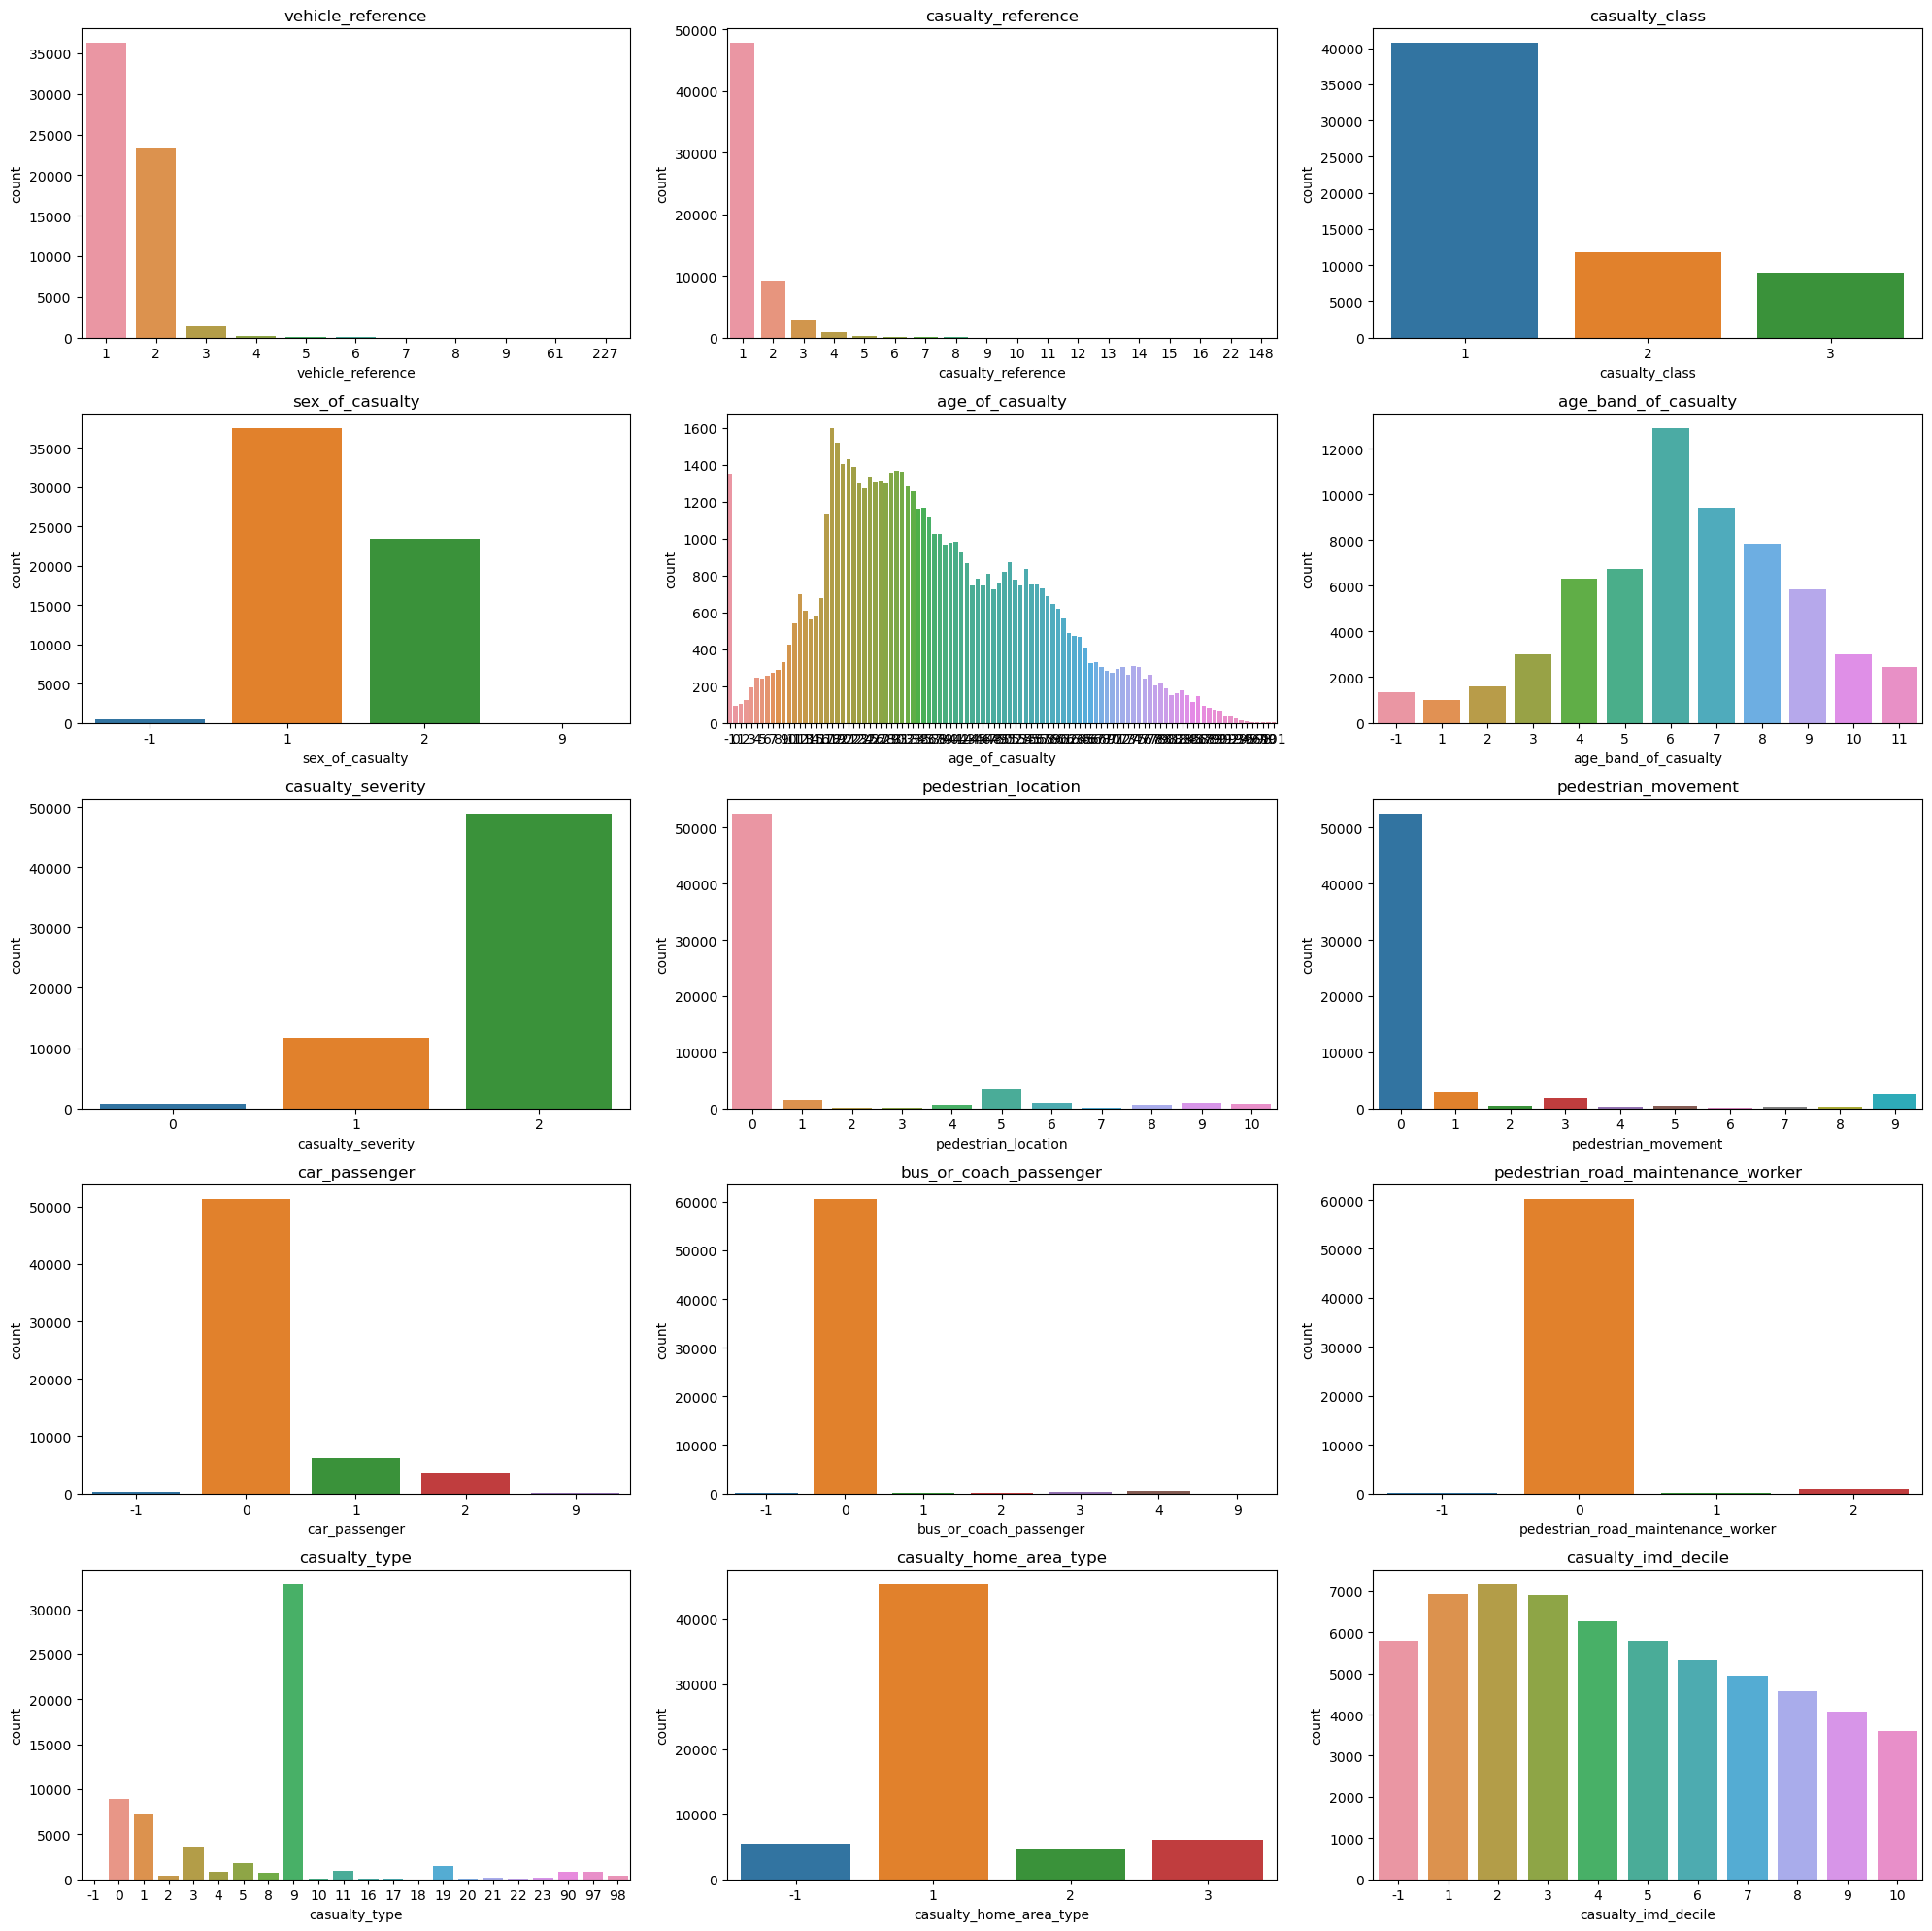

In [14]:
# Define the columns to plot
columns_to_plot = ['vehicle_reference','casualty_reference','casualty_class', 
                   'sex_of_casualty', 'age_of_casualty', 'age_band_of_casualty',
                   'casualty_severity', 'pedestrian_location', 'pedestrian_movement', 
                   'car_passenger', 'bus_or_coach_passenger', 'pedestrian_road_maintenance_worker', 
                   'casualty_type', 'casualty_home_area_type', 'casualty_imd_decile']

# Set up the subplot layout
num_rows = 5
num_cols = (len(columns_to_plot) + num_rows - 1) // num_rows
plt.figure(figsize=(20, 20))

# Create subplots
for i, col in enumerate(columns_to_plot, start=1):
    plt.subplot(num_rows, num_cols, i)
    sns.countplot(x=col, data=df)
    plt.title(col)

plt.tight_layout()
plt.show()


In [15]:
cmap = sns.color_palette("Blues", as_cmap=True)

In [19]:
# # Compute the correlation matrix
# corr_matrix = df.corr(numeric_only=True)

# # Generate a mask for the upper triangle
# mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# # Set up the matplotlib figure
# plt.figure(figsize=(18, 8))

# # Plot the heatmap with annotations in the lower triangular part
# sns.heatmap(corr_matrix, mask=mask, annot=True, fmt=".2f", linewidth=.3, cmap='coolwarm', square=True)

# plt.title('Correlation Matrix with Values', fontsize=25)
# plt.show()


In [20]:
# Setting Style of Dataframes :
def style(df):
    formatted_df = df.applymap(lambda x: f'{x:.3f}' if isinstance(x, float) else x)
    styled_df = formatted_df.style.set_properties(**{'border': '1.3px solid blue',
                                           'color': 'darkblue',
                                           'background-color': '#C2DFFF'})
    
    return styled_df

In [21]:
# corr = pd.DataFrame({'Correlation with casualty_severity by percentage': (df.corr(numeric_only=True)['casualty_severity'].sort_values(ascending=False) * 100).round(3)})
# style(corr)

In [ ]:
df.nunique()

In [ ]:
df.columns

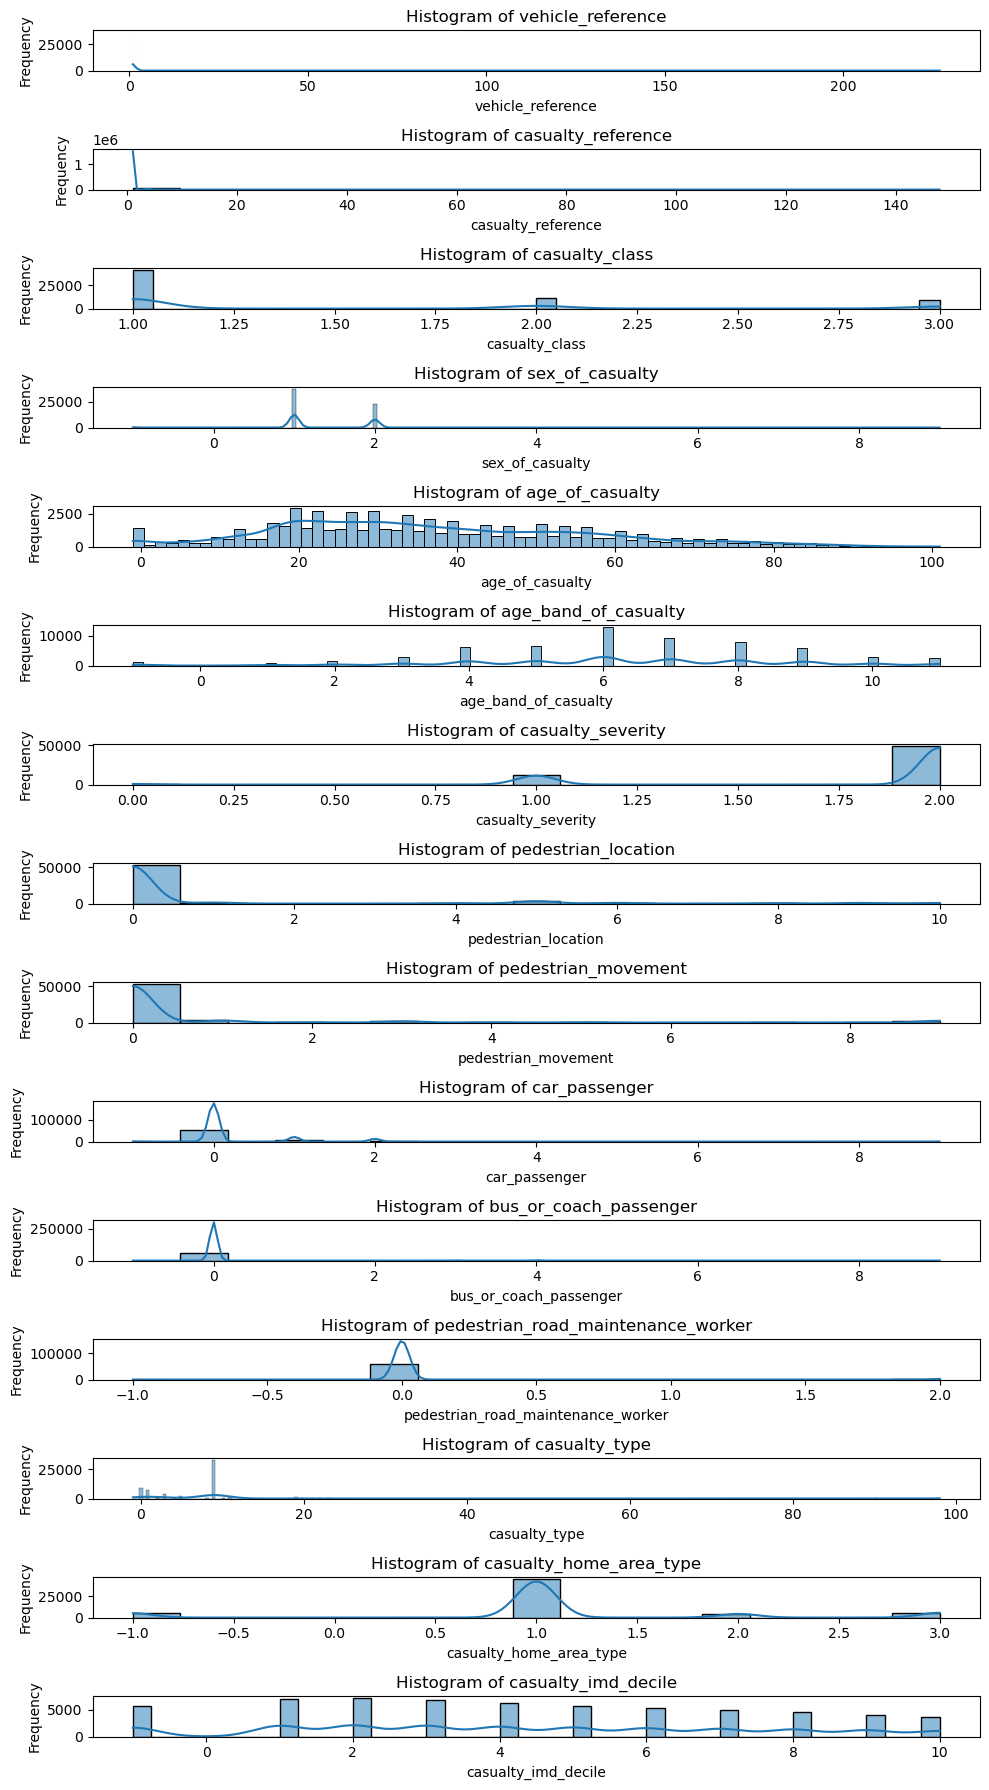

In [22]:
# Columns to plot histograms
columns_to_plot = ['vehicle_reference','casualty_reference','casualty_class', 
                   'sex_of_casualty', 'age_of_casualty', 'age_band_of_casualty',
                   'casualty_severity', 'pedestrian_location', 'pedestrian_movement', 
                   'car_passenger', 'bus_or_coach_passenger', 'pedestrian_road_maintenance_worker', 
                   'casualty_type', 'casualty_home_area_type', 'casualty_imd_decile']
# Create subplots
fig, axes = plt.subplots(nrows=len(columns_to_plot), ncols=1, figsize=(10, 18))

# Plot histograms for each column
for i, col in enumerate(columns_to_plot):
    sns.histplot(df[col], ax=axes[i], kde=True)
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()


<a id="eda"></a>
# <p style="background-color:#990033; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:20px 20px;">Step 5: Data Preprocessing</p>

⬆️ [Tabel of Contents](#contents_tabel)

<a id="missing"></a>
# <span style='background-color:#990033; font-family:calibri; color:white; border-radius:15px 15px;'>Step 5.1: Data Cleaning</span>

In [23]:
print(f'Shape before cleaning: {df.shape[0]} rows and {df.shape[1]} columns.\n')
print(df.columns)


Shape before cleaning: 61352 rows and 20 columns.

Index(['status', 'accident_index', 'accident_year', 'accident_reference',
       'vehicle_reference', 'casualty_reference', 'casualty_class',
       'sex_of_casualty', 'age_of_casualty', 'age_band_of_casualty',
       'casualty_severity', 'pedestrian_location', 'pedestrian_movement',
       'car_passenger', 'bus_or_coach_passenger',
       'pedestrian_road_maintenance_worker', 'casualty_type',
       'casualty_home_area_type', 'casualty_imd_decile', 'lsoa_of_casualty'],
      dtype='object')


In [24]:
# Drop unnecessary columns
# There is only one value for status and accident_year columns.
df = df.drop(['status',
              'accident_year',
              'accident_index',
              'accident_reference',
            #   'age_band_of_casualty',
              'lsoa_of_casualty'], axis=1)
df = df.drop([], axis=1)

df.shape

(61352, 15)

In [25]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
vehicle_reference,61352.0,1.450368,1.109855,1.0,1.0,1.0,2.0,227.0
casualty_reference,61352.0,1.333779,0.981507,1.0,1.0,1.0,1.0,148.0
casualty_class,61352.0,1.482299,0.735614,1.0,1.0,1.0,2.0,3.0
sex_of_casualty,61352.0,1.368790,0.534536,-1.0,1.0,1.0,2.0,9.0
age_of_casualty,61352.0,36.670312,19.574357,-1.0,22.0,34.0,50.0,101.0
age_band_of_casualty,61352.0,6.288157,2.463082,-1.0,5.0,6.0,8.0,11.0
casualty_severity,61352.0,1.783039,0.442318,0.0,2.0,2.0,2.0,2.0
pedestrian_location,61352.0,0.800316,2.197167,0.0,0.0,0.0,0.0,10.0
pedestrian_movement,61352.0,0.645325,2.009611,0.0,0.0,0.0,0.0,9.0
car_passenger,61352.0,0.222047,0.615127,-1.0,0.0,0.0,0.0,9.0


In [26]:
columns_with_missing_values = df.columns[(df == -1).any()]

print("Columns with value -1:")
print(columns_with_missing_values)


Columns with value -1:
Index(['sex_of_casualty', 'age_of_casualty', 'age_band_of_casualty',
       'car_passenger', 'bus_or_coach_passenger',
       'pedestrian_road_maintenance_worker', 'casualty_type',
       'casualty_home_area_type', 'casualty_imd_decile'],
      dtype='object')


In [27]:
missing_values_in_columns = df.eq(-1).sum()

print("Occurrences of -1 in each column:")
print(missing_values_in_columns)

Occurrences of -1 in each column:
vehicle_reference                        0
casualty_reference                       0
casualty_class                           0
sex_of_casualty                        448
age_of_casualty                       1350
age_band_of_casualty                  1350
casualty_severity                        0
pedestrian_location                      0
pedestrian_movement                      0
car_passenger                          314
bus_or_coach_passenger                  23
pedestrian_road_maintenance_worker     113
casualty_type                            5
casualty_home_area_type               5498
casualty_imd_decile                   5784
dtype: int64


In [99]:
# Replace all occurrences of -1 with NaN
df.replace(-1, np.NaN, inplace=True)
nulls = df.isnull().sum()
nulls

vehicle_reference                      0
casualty_reference                     0
casualty_class                         0
sex_of_casualty                        0
age_of_casualty                        0
age_band_of_casualty                  86
casualty_severity                      0
pedestrian_location                    0
pedestrian_movement                    0
car_passenger                          0
bus_or_coach_passenger                 0
pedestrian_road_maintenance_worker     0
casualty_type                          0
casualty_home_area_type                0
casualty_imd_decile                    0
dtype: int64

In [29]:
if sum(nulls) == 0:
    print('There is no Null data!')
else:
    print('There are Null data!')


There are Null data!


In [95]:
# Impute missing values for numerical columns with mean
numerical_columns = ['age_of_casualty']
for column in numerical_columns:
    df[column].fillna(df[column].mean(), inplace=True)



In [96]:
df['age_band_of_casualty'].unique()

[8.0, 6.0, 9.0, 11.0, 10.0, ..., 7.0, 2.0, 5.0, 4.0, 1.0]
Length: 11
Categories (11, float64): [1.0 < 2.0 < 3.0 < 4.0 ... 8.0 < 9.0 < 10.0 < 11.0]

In [97]:
# labels=['0 - 5', '6 - 10', '11 - 15', '16 - 20', '21 - 25', 
#         '26 - 35', '36 - 45', '46 - 55', '56 - 65', '66 - 75', 'Over 75'],

# Replace null values in 'age_band_of_casualty' based on 'age_of_casualty'
df['age_band_of_casualty'] = pd.cut(df['age_of_casualty'], 
                                     bins=[0, 6, 11, 16, 21, 26, 36, 46, 56, 66, 76, float('inf')],
                                     labels = np.arange(1.0, 12.0),
                                     right=True, )
df['age_band_of_casualty']

0         7.0
1         6.0
2         9.0
3        11.0
4         9.0
         ... 
61347     8.0
61348     3.0
61349     7.0
61350     7.0
61351    10.0
Name: age_band_of_casualty, Length: 59501, dtype: category
Categories (11, float64): [1.0 < 2.0 < 3.0 < 4.0 ... 8.0 < 9.0 < 10.0 < 11.0]

In [41]:

# Impute missing values for categorical columns with mode
categorical_columns = ['sex_of_casualty',
                       'car_passenger',
                       'bus_or_coach_passenger',
                       'pedestrian_road_maintenance_worker',
                       'casualty_type',
                       'casualty_home_area_type',
                       'casualty_imd_decile'
                       ]
for column in categorical_columns:
    df[column].fillna(df[column].mode()[0], inplace=True)

# Impute missing values for other columns as needed

# Verify if all missing values are handled
print(df.isnull().sum())

vehicle_reference                     0
casualty_reference                    0
casualty_class                        0
sex_of_casualty                       0
age_of_casualty                       0
age_band_of_casualty                  0
casualty_severity                     0
pedestrian_location                   0
pedestrian_movement                   0
car_passenger                         0
bus_or_coach_passenger                0
pedestrian_road_maintenance_worker    0
casualty_type                         0
casualty_home_area_type               0
casualty_imd_decile                   0
dtype: int64


<a id="split"></a>
# <b><span style='color:#8fc265'>Step 5.2.1 |</span><span style='color:#990033'> Remove Outliers</span></b>

In [42]:
def value_counts(df, column):
    # Calculate the frequency of each value in the "sex_of_casualty" column
    frequency = df[column].value_counts()
    
    # Print the frequency of every value
    print(f"Frequency of each value for DataFrame['{column}']: \n{frequency}")

In [43]:
def remove_outliers(df, column, values_to_remove):
    """
    Remove rows from a DataFrame where the specified column contains specified values.

    Args:
        df (DataFrame): The pandas DataFrame.
        column (str): The column name to check for outliers.
        values_to_remove (list): A list of values to remove from the specified column.

    Returns:
        DataFrame: The DataFrame with outliers removed.
    """
    # Create a boolean mask to identify rows with the specified values to remove
    mask = df[column].isin(values_to_remove)
    
    # Use the mask to filter out rows with the specified values and create a new DataFrame
    filtered_df = df[~mask]
    
    # Optionally, you can modify the original DataFrame in place by uncommenting the following line:
    # df.drop(df[mask].index, inplace=True)
    
    return filtered_df

In [44]:
def count_plot_df(df, column, label=None):
    # Set the style of the seaborn plot
    sns.set_style("whitegrid")
    
    # Create the count plot
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=column, palette="viridis")
    
    # Rotate x-axis labels for better readability (if needed)
    plt.xticks(rotation=45)
    
    # Add labels and title
    if label is not None:
        plt.xlabel(label)
        plt.ylabel("Frequency")
        plt.title(f"Frequency Plot of {label}")
    else:
        plt.ylabel("Frequency")
        plt.title(f"Frequency Plot")
        
    
    # Show the plot
    plt.tight_layout()
    plt.show()


In [45]:
df['vehicle_reference'].unique()

array([  2,   1,   3,   4,   5,   8,   6,   9, 227,   7,  61])

In [46]:
value_counts(df, 'vehicle_reference')

Frequency of each value for DataFrame['vehicle_reference']: 
vehicle_reference
1      36255
2      23337
3       1427
4        227
5         71
6         19
7          7
8          4
9          3
227        1
61         1
Name: count, dtype: int64


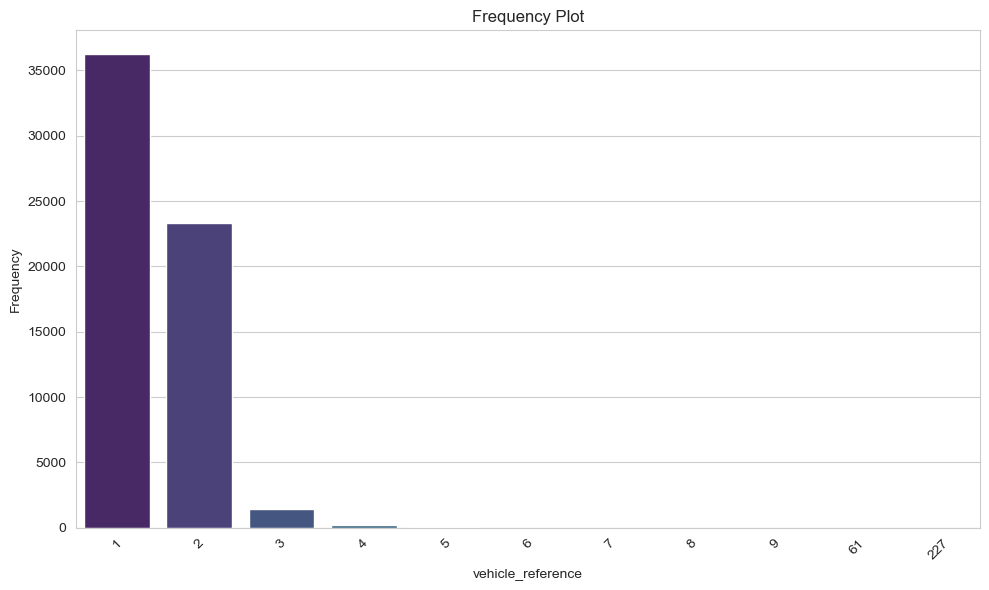

In [47]:
count_plot_df(df, 'vehicle_reference')

In [48]:
vehicle_reference_to_remove = [5, 6, 7, 8, 9, 61, 227]
df = remove_outliers(df, "vehicle_reference", vehicle_reference_to_remove)
df.shape

(61246, 15)

Frequency of each value for DataFrame['casualty_reference']: 
casualty_reference
1      47763
2       9269
3       2779
4        927
5        318
6         93
7         35
8         13
9         11
10        10
11         7
12         6
14         4
13         4
15         3
16         2
22         1
148        1
Name: count, dtype: int64


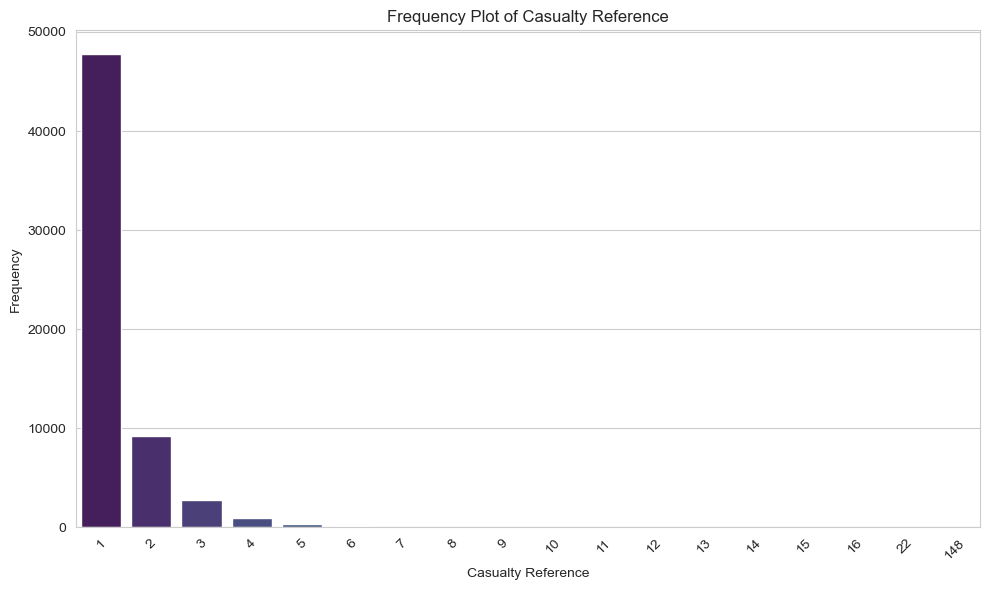

In [49]:
value_counts(df, 'casualty_reference')
count_plot_df(df, 'casualty_reference', label="Casualty Reference")

In [50]:
# Values to remove
casualty_reference_to_remove = [6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 22, 148]

df = remove_outliers(df, "casualty_reference", casualty_reference_to_remove)
df.shape

(61056, 15)

In [51]:
# Calculate the frequency of each value in the "casualty_class" column
value_counts(df, 'casualty_class')

Frequency of each value for DataFrame['casualty_class']: 
casualty_class
1    40610
2    11510
3     8936
Name: count, dtype: int64


In [52]:
# Calculate the frequency of each value in the "casualty_type" column
value_counts(df, 'casualty_type')

Frequency of each value for DataFrame['casualty_type']: 
casualty_type
9.0     32514
0.0      8936
1.0      7154
3.0      3627
5.0      1791
19.0     1437
11.0      926
97.0      859
90.0      827
4.0       822
8.0       694
98.0      413
2.0       410
21.0      178
23.0      127
22.0      110
10.0       86
20.0       76
16.0       34
17.0       31
18.0        4
Name: count, dtype: int64


In [53]:
# Calculate the percentage of each casualty type
casualty_type_counts = df['casualty_type'].value_counts(normalize=True) * 100
casualty_type_counts
# Find casualty types that occur less than 1% of all data
rare_types = casualty_type_counts[casualty_type_counts < 1].index
rare_types
# Filter out rows with rare casualty types
df_filtered = df[~df['casualty_type'].isin(rare_types)]

# Print the shape of the filtered DataFrame to see how many rows were removed
print("Original DataFrame shape:", df.shape)
print("Filtered DataFrame shape:", df_filtered.shape)


Original DataFrame shape: (61056, 15)
Filtered DataFrame shape: (59587, 15)


In [54]:
df = df_filtered
df.shape

(59587, 15)

In [55]:
# Calculate the frequency of each value in the "sex_of_casualty" column
value_counts(df, 'sex_of_casualty')

Frequency of each value for DataFrame['sex_of_casualty']: 
sex_of_casualty
1.0    36524
2.0    23053
9.0       10
Name: count, dtype: int64


In [56]:
# Values to remove
sex_of_casualty_to_remove = [-1, 9]

df = remove_outliers(df, 'sex_of_casualty', sex_of_casualty_to_remove)
df.shape

(59577, 15)

In [57]:
# Calculate the frequency of each value in the "age_of_casualty" column
value_counts(df, 'age_of_casualty')

Frequency of each value for DataFrame['age_of_casualty']: 
age_of_casualty
18.0     1559
19.0     1482
21.0     1384
20.0     1373
22.0     1352
         ... 
96.0        4
99.0        3
97.0        3
98.0        2
101.0       1
Name: count, Length: 102, dtype: int64


In [58]:
# Calculate the percentage of each casualty type
age_of_casualty_counts = df['age_of_casualty'].value_counts(normalize=True) * 100
age_of_casualty_counts
# Find casualty types that occur less than 1% of all data
rare_types = age_of_casualty_counts[age_of_casualty_counts < 1].index
rare_types
# Filter out rows with rare casualty types
df_filtered = df[~df['age_of_casualty'].isin(rare_types)]

# Print the shape of the filtered DataFrame to see how many rows were removed
print("Original DataFrame shape:", df.shape)
print("Filtered DataFrame shape:", df_filtered.shape)


Original DataFrame shape: (59577, 15)
Filtered DataFrame shape: (46615, 15)


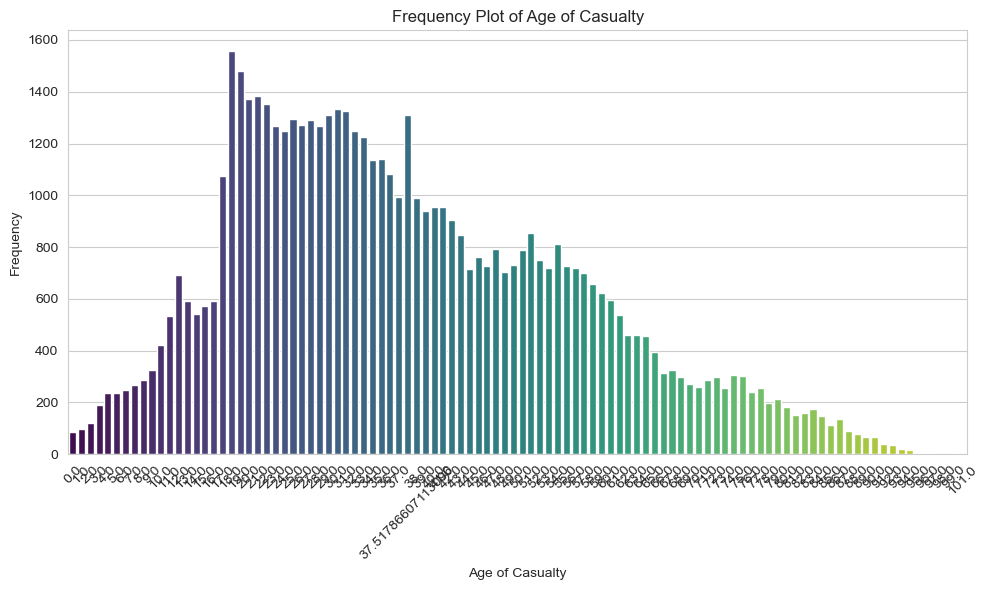

In [59]:
count_plot_df(df, 'age_of_casualty', "Age of Casualty")

In [60]:
# Calculate the frequency of each value in the "casualty_severity" column
value_counts(df, 'casualty_severity')

Frequency of each value for DataFrame['casualty_severity']: 
casualty_severity
2    47452
1    11360
0      765
Name: count, dtype: int64


In [61]:
# Calculate the frequency of each value in the "pedestrian_location" column
value_counts(df, 'pedestrian_location')

Frequency of each value for DataFrame['pedestrian_location']: 
pedestrian_location
0     50642
5      3351
1      1471
6      1047
9       952
10      867
8       564
4       546
7        63
2        42
3        32
Name: count, dtype: int64


In [62]:
# Calculate the frequency of each value in the "pedestrian_movement" column
value_counts(df, 'pedestrian_movement')

Frequency of each value for DataFrame['pedestrian_movement']: 
pedestrian_movement
0    50641
1     2847
9     2565
3     1782
5      481
2      429
4      322
7      226
8      224
6       60
Name: count, dtype: int64


In [63]:
# Calculate the frequency of each value in the "car_passenger" column
value_counts(df, 'car_passenger')

Frequency of each value for DataFrame['car_passenger']: 
car_passenger
0.0    49900
1.0     6110
2.0     3500
9.0       67
Name: count, dtype: int64


In [64]:
# Values to remove
car_passenger_to_remove = [9]

df = remove_outliers(df, 'car_passenger', car_passenger_to_remove)
df.shape

(59510, 15)

In [65]:
# Calculate the frequency of each value in the "bus_or_coach_passenger" column
value_counts(df, 'bus_or_coach_passenger')

Frequency of each value for DataFrame['bus_or_coach_passenger']: 
bus_or_coach_passenger
0.0    58702
4.0      445
3.0      264
2.0       59
1.0       31
9.0        9
Name: count, dtype: int64


In [66]:
# Values to remove
bus_or_coach_passenger_to_remove = [9]

df = remove_outliers(df, 'bus_or_coach_passenger', bus_or_coach_passenger_to_remove)
df.shape

(59501, 15)

In [67]:
# Calculate the frequency of each value in the "pedestrian_road_maintenance_worker" column
value_counts(df, 'pedestrian_road_maintenance_worker')

Frequency of each value for DataFrame['pedestrian_road_maintenance_worker']: 
pedestrian_road_maintenance_worker
0.0    58380
2.0     1006
1.0      115
Name: count, dtype: int64


In [68]:
# Calculate the frequency of each value in the "casualty_type" column
value_counts(df, 'casualty_type')

Frequency of each value for DataFrame['casualty_type']: 
casualty_type
9.0     32448
0.0      8935
1.0      7152
3.0      3626
5.0      1791
19.0     1437
11.0      918
97.0      859
90.0      827
4.0       822
8.0       686
Name: count, dtype: int64


In [69]:
# Calculate the frequency of each value in the "casualty_home_area_type" column
value_counts(df, 'casualty_home_area_type')

Frequency of each value for DataFrame['casualty_home_area_type']: 
casualty_home_area_type
1.0    49249
3.0     5812
2.0     4440
Name: count, dtype: int64


In [70]:
# Calculate the frequency of each value in the "casualty_imd_decile" column
value_counts(df, 'casualty_imd_decile')

Frequency of each value for DataFrame['casualty_imd_decile']: 
casualty_imd_decile
2.0     12489
3.0      6704
1.0      6678
4.0      6086
5.0      5618
6.0      5172
7.0      4807
8.0      4443
9.0      3967
10.0     3537
Name: count, dtype: int64


In [71]:
shape = df.shape
print(f'Dataset has {shape[0]} rows and {shape[1]} columns.')

Dataset has 59501 rows and 15 columns.


In [72]:
df.shape

(59501, 15)

<a id="eda"></a>
# <p style="background-color:#990033; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:20px 20px;">Step 6: Data Visualization</p>

⬆️ [Tabel of Contents](#contents_tabel)

casualties & deprivation

the relationship between casualties and deprivation varies by road user group and age group

Difference between most and least deprived areas

Casualties by road user type and IMD decile

Casualties by road user type, age and IMD decile

Chart 7: Bus occupant casualties by IMD decile of casualty home postcode, by age, 2018 to 2022 (England only)

Chart 8: Car occupant casualties by IMD decile of casualty home postcode, by age, 2018 to 2022 (England only)

Chart 9: Motor cyclist casualties by IMD decile of casualty home postcode, by age, 2018 to 2022 (England only)

Chart 10: Pedal cyclist casualties by IMD decile of casualty home postcode, by age, 2018 to 2022 (England only)

Chart 11: Proportion of pedestrian casualties by IMD decile of casualty home postcode, by age, 2018 to 2022 (England only)



In [73]:
# Create a cross-tabulation between 'Casualty_IMD_Decile' and 'Casualty_Severity'
cross_tab = pd.crosstab(df['casualty_imd_decile'], df['casualty_severity'], normalize='index')

# Display the cross-tabulation
print(cross_tab)


casualty_severity           0         1         2
casualty_imd_decile                              
1.0                  0.009134  0.197664  0.793202
2.0                  0.015694  0.184322  0.799984
3.0                  0.012082  0.170346  0.817572
4.0                  0.011173  0.179593  0.809234
5.0                  0.011926  0.185653  0.802421
6.0                  0.014308  0.198376  0.787316
7.0                  0.012898  0.197628  0.789474
8.0                  0.012379  0.209768  0.777853
9.0                  0.014369  0.208722  0.776910
10.0                 0.012440  0.204411  0.783150


AttributeError: 'int' object has no attribute 'startswith'

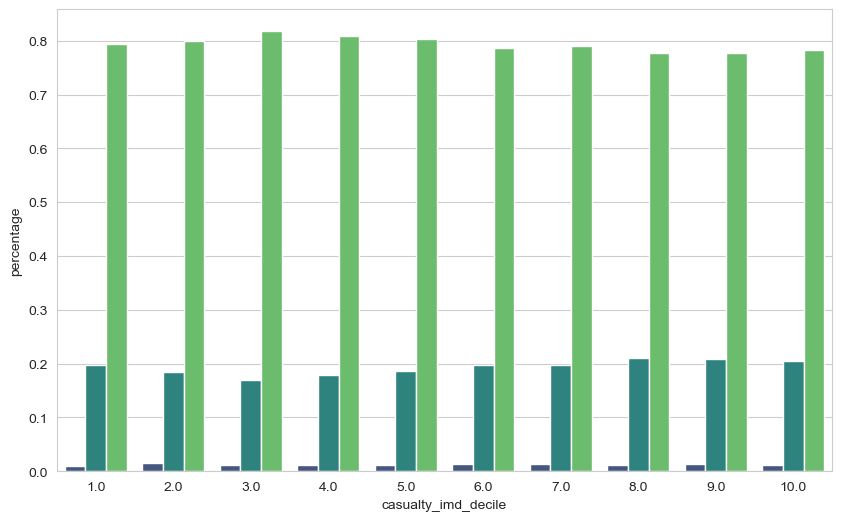

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a cross-tabulation between 'Casualty_IMD_Decile' and 'Casualty_Severity'
cross_tab = pd.crosstab(df['casualty_imd_decile'], df['casualty_severity'], normalize='index')

# Reset index to make 'Casualty_IMD_Decile' a column instead of index
cross_tab = cross_tab.reset_index()

# Melt the cross-tabulation dataframe to make it suitable for seaborn barplot
cross_tab_melted = cross_tab.melt(id_vars='casualty_imd_decile', var_name='casualty_severity', value_name='percentage')

# Create bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=cross_tab_melted, x='casualty_imd_decile', y='percentage', hue='casualty_severity', palette='viridis')
plt.xlabel('Casualty IMD Decile')
plt.ylabel('Percentage')
plt.title('Percentage of Casualty Severity by IMD Decile')
plt.legend(title='Casualty Severity')
plt.show()


In [75]:
# Map numerical codes to meaningful labels
severity_mapping = {1: 'Fatal', 2: 'Serious', 3: 'Slight'}
sex_mapping = {1: 'Male', 2: 'Female'}
casualty_home_area_type_mapping = {1: 'Urban', 2: 'Small town', 3: 'Rural'}


In [76]:
df.columns

Index(['vehicle_reference', 'casualty_reference', 'casualty_class',
       'sex_of_casualty', 'age_of_casualty', 'age_band_of_casualty',
       'casualty_severity', 'pedestrian_location', 'pedestrian_movement',
       'car_passenger', 'bus_or_coach_passenger',
       'pedestrian_road_maintenance_worker', 'casualty_type',
       'casualty_home_area_type', 'casualty_imd_decile'],
      dtype='object')

In [77]:
# Calculate the percentage of each casualty severity within each IMD decile category
severity_imd_percentage = df.groupby(['casualty_imd_decile', 'casualty_severity']).size() / df.groupby('casualty_imd_decile').size() * 100
severity_imd_percentage = severity_imd_percentage.reset_index(name='Percentage')
# severity_imd_percentage


In [78]:
print(severity_imd_percentage.dtypes)


casualty_imd_decile    float64
casualty_severity        int64
Percentage             float64
dtype: object


In [79]:
severity_imd_percentage['casualty_severity'] = severity_imd_percentage['casualty_severity'].astype(str)


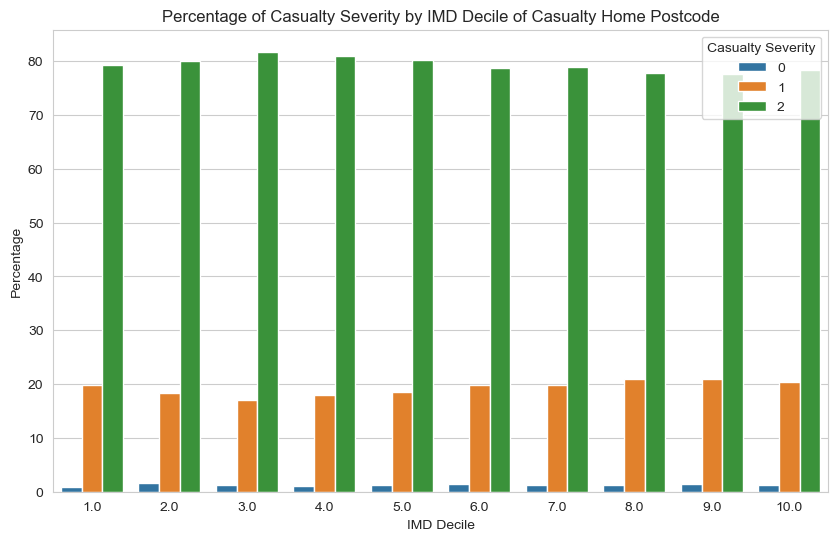

In [80]:
# Plotting the relationship between casualty severity and IMD decile
plt.figure(figsize=(10, 6))
sns.barplot(x='casualty_imd_decile', y='Percentage', hue='casualty_severity', data=severity_imd_percentage)

# sns.countplot(x=df['casualty_severity'].map(severity_mapping), order=['Fatal', 'Serious', 'Slight'])


plt.title('Percentage of Casualty Severity by IMD Decile of Casualty Home Postcode')
plt.xlabel('IMD Decile')
plt.ylabel('Percentage')
plt.legend(title='Casualty Severity', loc='upper right')
plt.show()

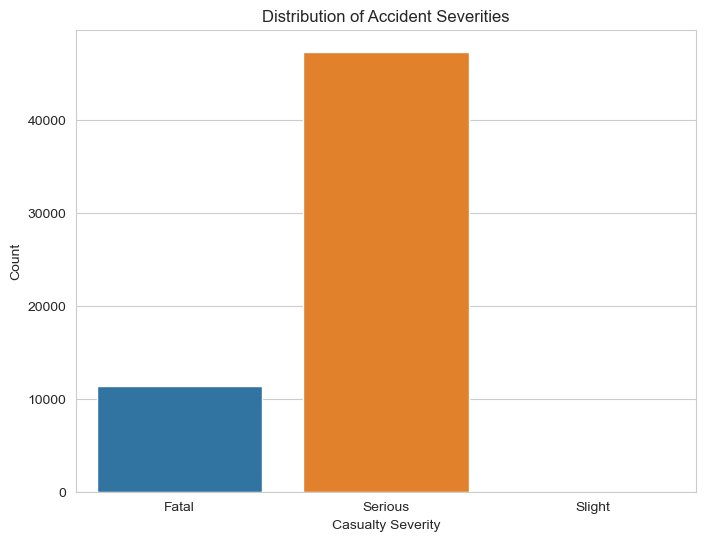

In [81]:
# Mapping of casualty severity codes to descriptions

# Plot the distribution of accident severities
plt.figure(figsize=(8, 6))
sns.countplot(x=df['casualty_severity'].map(severity_mapping), order=['Fatal', 'Serious', 'Slight'])
plt.title('Distribution of Accident Severities')
plt.xlabel('Casualty Severity')
plt.ylabel('Count')
plt.show()


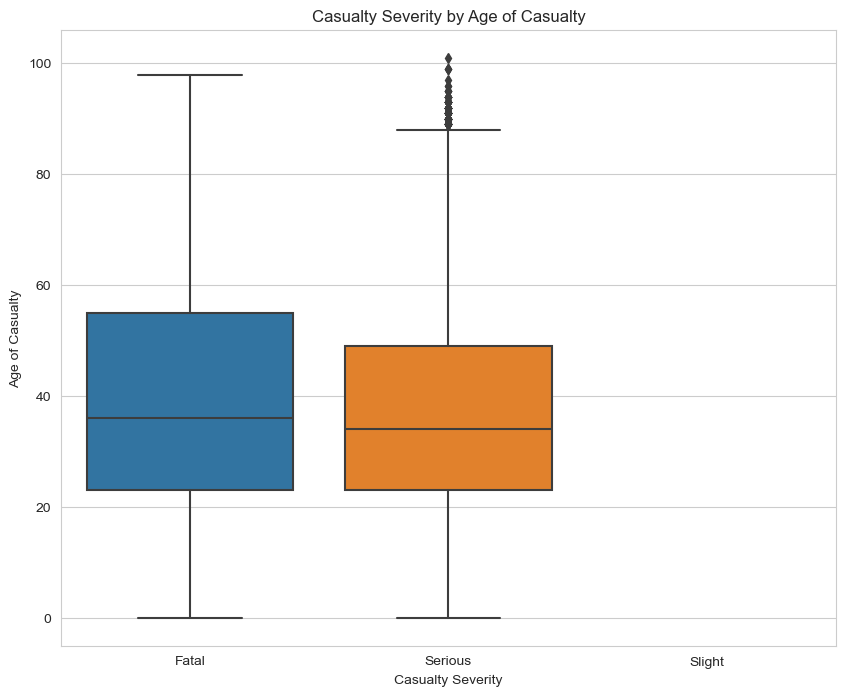

In [82]:
# Plot the relationship between casualty severity and age band
plt.figure(figsize=(10, 8))

sns.boxplot(
    x=df['casualty_severity'].map(severity_mapping),
    y='age_of_casualty',
    data=df,
    order=['Fatal', 'Serious', 'Slight'],
    )
# sns.boxplot(x='casualty_severity_label', y='age_of_casualty', data=df, hue_order=['Fatal', 'Serious', 'Slight'])
plt.title('Casualty Severity by Age of Casualty')
plt.xlabel('Casualty Severity')
plt.ylabel('Age of Casualty')
plt.show()


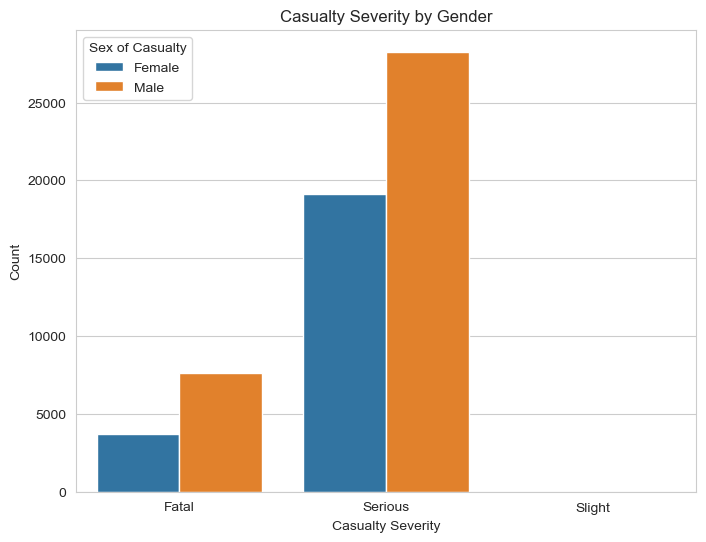

In [83]:

# Plot the relationship between casualty severity and gender
# df['casualty_severity_label'] = df['casualty_severity'].map(severity_mapping)

plt.figure(figsize=(8, 6))
# sns.countplot(x='casualty_severity_label',
sns.countplot(x=df['casualty_severity'].map(severity_mapping),
              hue=df['sex_of_casualty'].map(sex_mapping),
              data=df,
              order=['Fatal', 'Serious', 'Slight'],
            )
plt.title('Casualty Severity by Gender')
plt.xlabel('Casualty Severity')
plt.ylabel('Count')
plt.legend(title='Sex of Casualty')
plt.show()


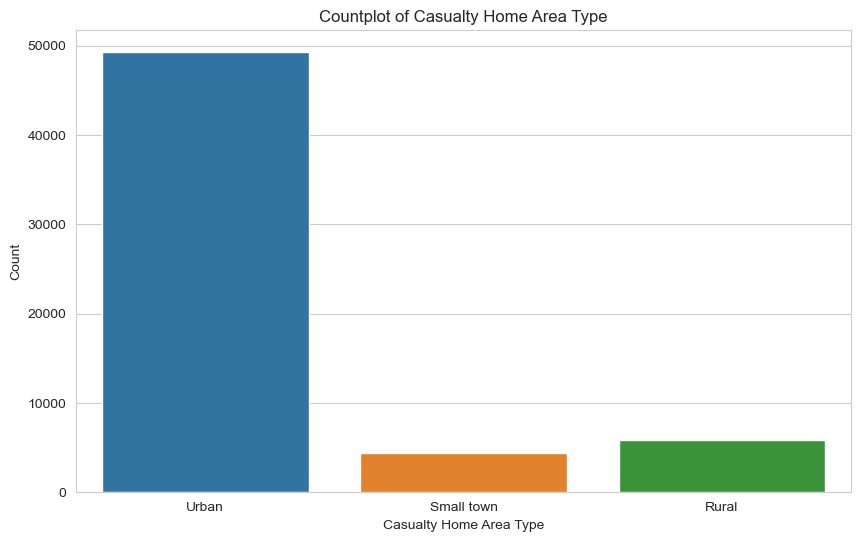

In [84]:
plt.figure(figsize=(10, 6))
sns.countplot(x='casualty_home_area_type', data=df)
sns.countplot(x=df['casualty_home_area_type'].map(casualty_home_area_type_mapping), data=df)
plt.title('Countplot of Casualty Home Area Type')
plt.xlabel('Casualty Home Area Type')
plt.ylabel('Count')
plt.show()

<a id="eda"></a>
# <p style="background-color:#990033; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:20px 20px;">Step 7: Model Building</p>

⬆️ [Tabel of Contents](#contents_tabel)

In [85]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier


In [86]:
X = df.drop('casualty_severity', axis=1)
y = df['casualty_severity']


In [87]:

# Assuming X contains your features and y contains the target variable (casualty severity)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [88]:
X.isnull().sum()

vehicle_reference                     0
casualty_reference                    0
casualty_class                        0
sex_of_casualty                       0
age_of_casualty                       0
age_band_of_casualty                  0
pedestrian_location                   0
pedestrian_movement                   0
car_passenger                         0
bus_or_coach_passenger                0
pedestrian_road_maintenance_worker    0
casualty_type                         0
casualty_home_area_type               0
casualty_imd_decile                   0
dtype: int64

In [89]:

# Initialize and train the decision tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = dt_classifier.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Decision Tree Classifier Accuracy:", accuracy)


Decision Tree Classifier Accuracy: 0.699100915889421


In [90]:
# Initialize and train the random forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_classifier.predict(X_test)

# Evaluate accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Classifier Accuracy:", accuracy_rf)


Random Forest Classifier Accuracy: 0.7559028653054365


In [91]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize and train the gradient boosting classifier
gbm_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)
gbm_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred_gbm = gbm_classifier.predict(X_test)

# Evaluate accuracy
accuracy_gbm = accuracy_score(y_test, y_pred_gbm)
print("Gradient Boosting Classifier Accuracy:", accuracy_gbm)


Gradient Boosting Classifier Accuracy: 0.7964036635576842


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 59501 entries, 0 to 61351
Data columns (total 15 columns):
 #   Column                              Non-Null Count  Dtype   
---  ------                              --------------  -----   
 0   vehicle_reference                   59501 non-null  int64   
 1   casualty_reference                  59501 non-null  int64   
 2   casualty_class                      59501 non-null  int64   
 3   sex_of_casualty                     59501 non-null  float64 
 4   age_of_casualty                     59501 non-null  float64 
 5   age_band_of_casualty                59415 non-null  category
 6   casualty_severity                   59501 non-null  int64   
 7   pedestrian_location                 59501 non-null  int64   
 8   pedestrian_movement                 59501 non-null  int64   
 9   car_passenger                       59501 non-null  float64 
 10  bus_or_coach_passenger              59501 non-null  float64 
 11  pedestrian_road_maintenance_worke

In [92]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

num_classes = 3

# Assuming X contains your features and y contains the target variable (casualty severity)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert the data into DMatrix format, which is a specific data structure used by XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Define hyperparameters for XGBoost
params = {
    'objective': 'multi:softmax',  # Use softmax for multiclass classification
    'num_class': num_classes,      # Specify the number of classes (e.g., 3 for low, medium, high severity)
    'eta': 0.1,                    # Learning rate
    'max_depth': 8,                # Maximum depth of the tree
    'subsample': 0.8,              # Subsample ratio of the training instances
    'colsample_bytree': 0.8,       # Subsample ratio of columns when constructing each tree
    'eval_metric': 'merror'        # Evaluation metric (merror for multiclass classification error)
}

# Train the XGBoost model
num_rounds = 100  # Number of boosting rounds
xgb_model = xgb.train(params, dtrain, num_rounds)

# Predict on the test set
y_pred_xgb = xgb_model.predict(dtest)

# Evaluate accuracy
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print("XGBoost Classifier Accuracy:", accuracy_xgb)


ValueError: DataFrame.dtypes for data must be int, float, bool or category. When categorical type is supplied, The experimental DMatrix parameter`enable_categorical` must be set to `True`.  Invalid columns:age_band_of_casualty: category

<a id="eda"></a>
# <p style="background-color:#990033; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:20px 20px;">Step 8: Interpretation and Insights </p>

⬆️ [Tabel of Contents](#contents_tabel)